## Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, output_file, show, curdoc
from bokeh.models import HoverTool, CategoricalColorMapper, Slider, Select, Button
from bokeh.layouts import column, row, gridplot, widgetbox
from bokeh.models.widgets import Tabs, Panel

## Reading Datasets

In [2]:
housePropertyDataset = pd.read_csv('house_property_sales.csv')

## Seaborn Library
There is a package seaborn library available. Using which we can generate detailed chart representation.

Here we have also used legend to display legend and positioned it top right.

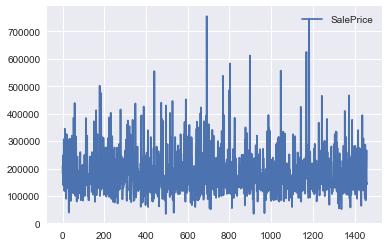

In [3]:
sns.set()

plt.plot(housePropertyDataset['SalePrice'])

plt.legend(loc='upper right')
plt.show()

## Zoom Axes
You will now create the same figure as in the previous exercise using plt.plot(), this time setting the axis extents using plt.xlim() and plt.ylim(). These commands allow you to either zoom or expand the plot or to set the axis ranges to include important values (such as the origin).

NOTE: After creating the plot, we will use plt.savefig() to export the image produced to a file.

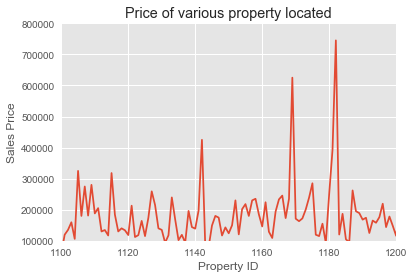

In [4]:
sns.set()

# We can use the styles for the plot
# print(plt.style.available) used to print all available styles
plt.style.use('ggplot')

plt.plot(housePropertyDataset['SalePrice'])

plt.xlabel('Property ID')
plt.ylabel('Sales Price')

plt.xlim(1100,1200)
plt.ylim(100000,800000)

plt.title('Price of various property located')

plt.show()


## Using axes() function
Used to define the axes where we need to plot our graphs. Axes will define the axes for each and every individual plot to be drawn.

axes comamnd accept array of four arguments which are:

axes([x_low, y_low, width, height])

    x_low: is the starting point of x-axis
    y_low: Is starting point of y-axis
    width: Is the total size of x axis
    height: Is total size of y axis

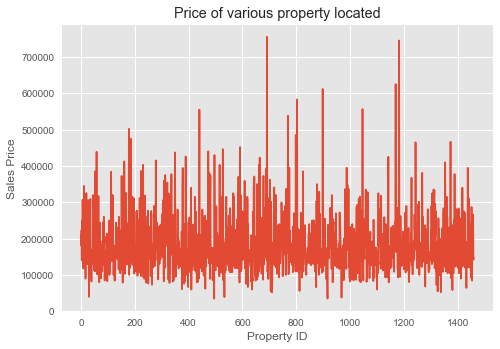

In [5]:
plt.axes([200, 100000, 1, 1])
plt.plot(housePropertyDataset['SalePrice'])

plt.xlabel('Property ID')
plt.ylabel('Sales Price')

plt.title('Price of various property located')

plt.show()


## Using subplots() function
Using subplots like this is a better alternative to using plt.axes(). We can manually add more than one plot in the same figure.

Subplot accepts three arguments,
subplot(n_rows, n_columns, n_subplot)

Subplot ordering is row wise top left corner.

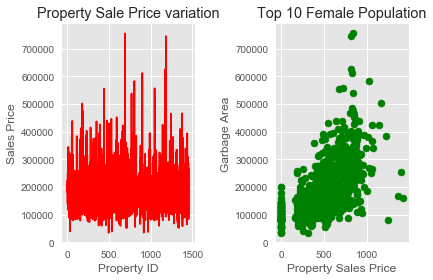

In [6]:
plt.style.use('ggplot')

plt.subplot(1,2,1)
plt.plot(housePropertyDataset['SalePrice'], color='red')
plt.title('Property Sale Price variation')
plt.xlabel('Property ID')
plt.ylabel('Sales Price')

plt.subplot(1,2,2)
plt.scatter(housePropertyDataset['GarageArea'],housePropertyDataset['SalePrice'], color='green')
plt.title('Top 10 Female Population')
plt.xlabel('Property Sales Price')
plt.ylabel('Garbage Area')


# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

## Bivariate Plots
Let's check whether there is any significance or trend in sex_ratio and total effective literacy rate.

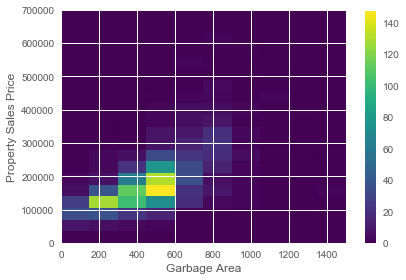

In [7]:
x = housePropertyDataset['GarageArea']
y = housePropertyDataset['SalePrice']
plt.hist2d(x,y, bins=(10,20), range=((0, 1500), (0, 700000)), cmap='viridis')

plt.colorbar()

plt.xlabel('Garbage Area')
plt.ylabel('Property Sales Price')

plt.tight_layout()
plt.show()

## Plotting second order regression plots

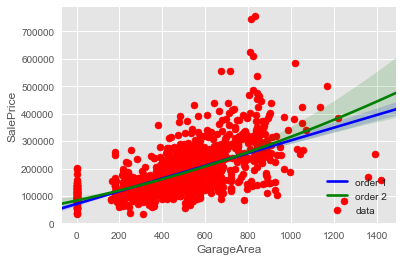

In [8]:
plt.scatter(housePropertyDataset['GarageArea'],housePropertyDataset['SalePrice'], label='data', 
            color='red', marker='o')

sns.regplot(x='GarageArea', y='SalePrice', data=housePropertyDataset
            , scatter=None, color='blue', label='order 1', order=1)

sns.regplot(x='GarageArea', y='SalePrice', data=housePropertyDataset
            , scatter=None, color='green', label='order 2', order=2)
plt.legend(loc='lower right')
plt.show()


As shown above, we have created rectangular bins for 2D array. In similar way, we can also generate haxagonal bins as well.

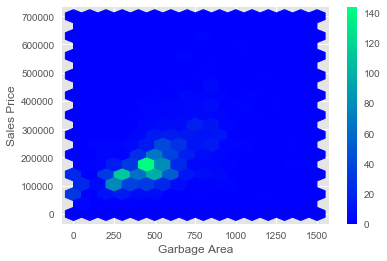

In [9]:
x = housePropertyDataset['GarageArea']
y = housePropertyDataset['SalePrice']
plt.hexbin(x,y, gridsize=(15,10),extent=(0, 1500, 0, 700000), cmap='winter')

plt.colorbar()

plt.xlabel('Garbage Area')
plt.ylabel('Sales Price')
plt.show()

# Looking at output of the graph, can we say males are more educated from female?

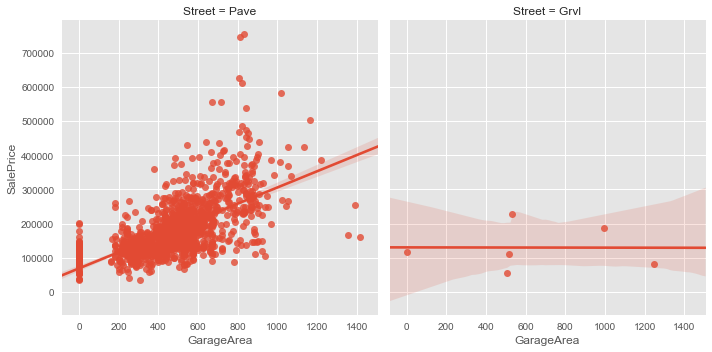

In [10]:
# Plot a linear regression between 'GarageArea' and 'SalePrice'
sns.lmplot(x='GarageArea', y='SalePrice', data=housePropertyDataset, 
           col='Street') # We can also use 'hue' parameter instead of col parameter to plt on the same graph

# Display the plot
plt.show()


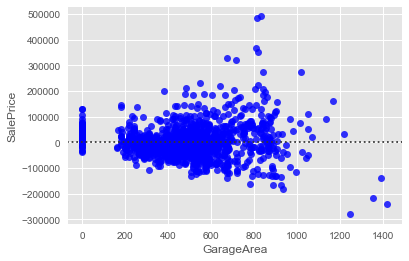

In [11]:
sns.residplot(x='GarageArea', y='SalePrice', data=housePropertyDataset, color='blue')

# Display the plot
plt.show()

## Mesh grid

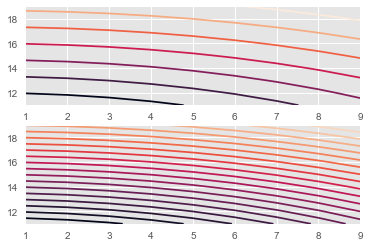

In [12]:
u = list(range(1, 10))
v = list(range(11, 20))
X,Y = np.meshgrid(u,v)
Z  = 3*np.sqrt(X**2 + Y**2)

plt.subplot(2,1,1)
plt.contour(X, Y, Z)

plt.subplot(2,1,2)
plt.contour(X, Y, Z, 20) # 20 contour


plt.show()

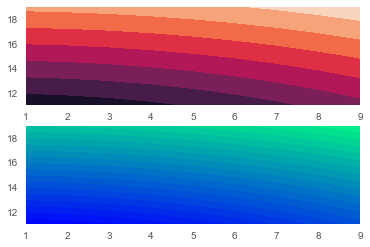

In [13]:
u = list(range(1, 10))
v = list(range(11, 20))
X,Y = np.meshgrid(u,v)
Z  = 3*np.sqrt(X**2 + Y**2)

plt.subplot(2,1,1)
plt.contourf(X, Y, Z)

plt.subplot(2,1,2)
plt.contourf(X, Y, Z, 20, cmap='winter') # 20 contour will be mapped


plt.show()

## Strip plot

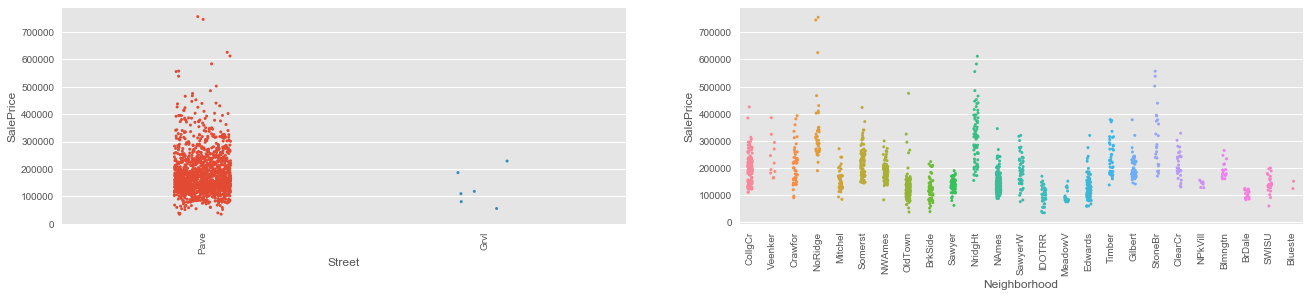

In [14]:
plt.subplot(1,2,1)
sns.stripplot(x='Street', y='SalePrice', data=housePropertyDataset, jitter=True, size=3)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Neighborhood', y='SalePrice', data=housePropertyDataset, jitter=True, size=3)
plt.xticks(rotation=90)

plt.subplots_adjust(right=3)
plt.show()


## Swarn Plot
Swarm plots are generally easier to understand than strip plots because they spread out the points to avoid overlap.

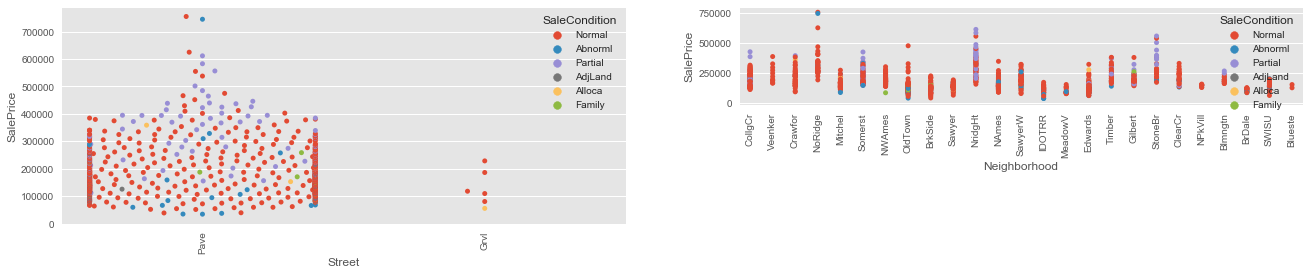

In [15]:
plt.subplot(1,2,1)
sns.swarmplot(x='Street', y='SalePrice', data=housePropertyDataset, hue='SaleCondition')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.stripplot(x='Neighborhood', y='SalePrice', data=housePropertyDataset, hue='SaleCondition')
plt.xticks(rotation=90)

plt.subplots_adjust(right=3)
plt.show()


## Violin Plot
violin plots are a nice way of visualizing the relationship between a continuous variable and a categorical variable

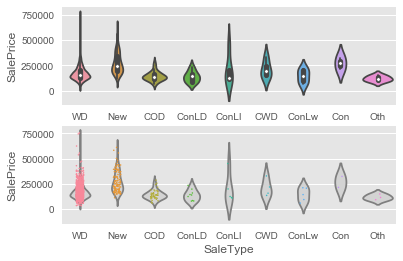

In [16]:
plt.subplot(2,1,1)
sns.violinplot(x='SaleType', y='SalePrice', data=housePropertyDataset)

plt.subplot(2,1,2)
sns.violinplot(x='SaleType', y='SalePrice', data=housePropertyDataset, color='lightgray', inner=None)

sns.stripplot(x='SaleType', y='SalePrice', data=housePropertyDataset, jitter=True, size=1.5)

plt.show()

## Joint Plot

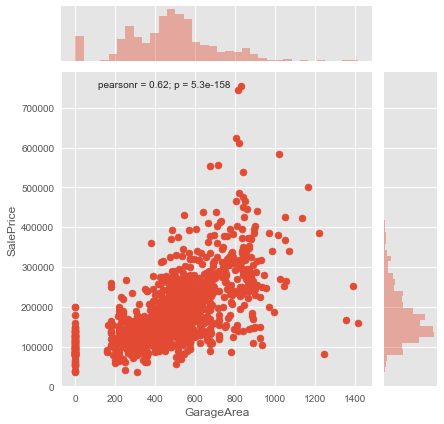

In [17]:
fig = plt.figure(figsize = (16,89))
sns.jointplot(x='GarageArea', y='SalePrice', data=housePropertyDataset)
plt.xticks(rotation=90)
plt.show()

## Pair Plot
It uses only integer columns only. Remaining columns are ignored.

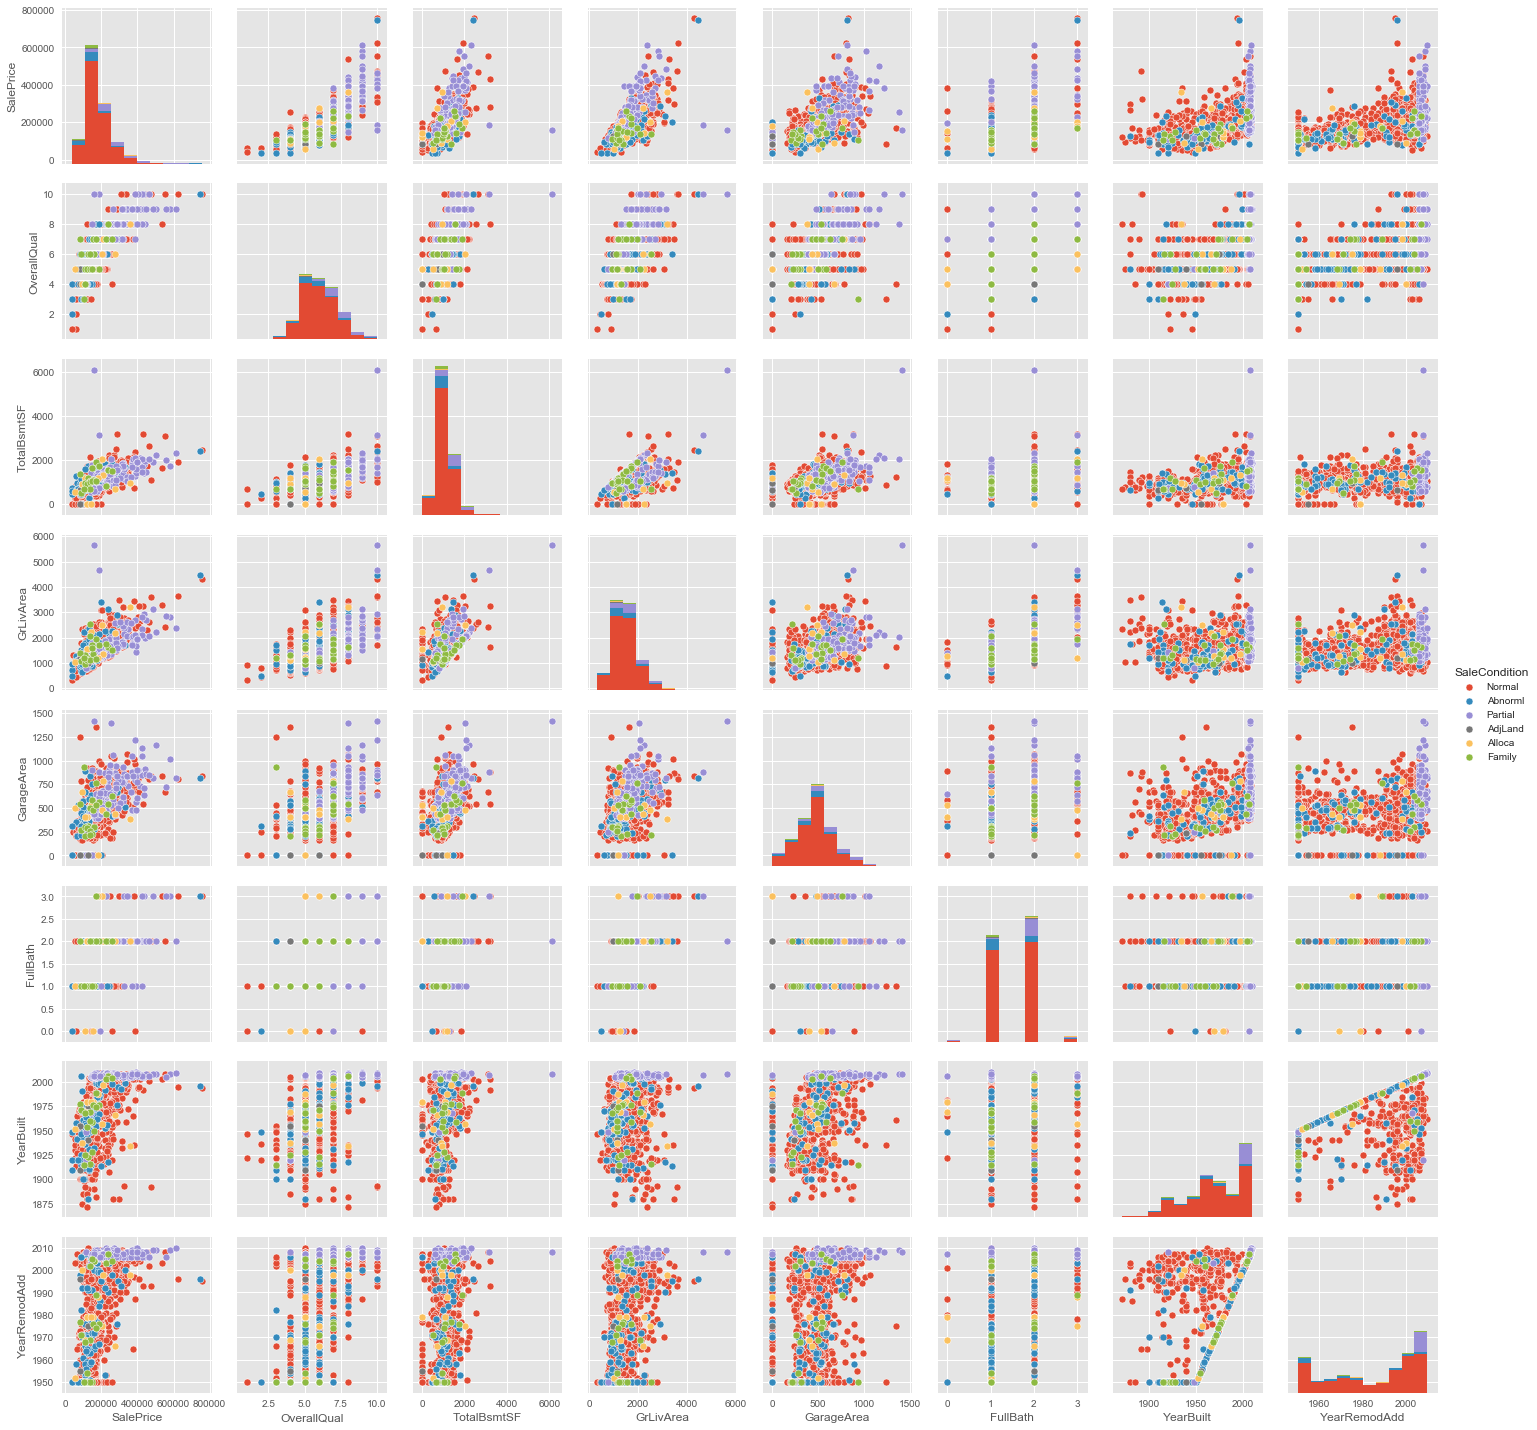

In [18]:
data = housePropertyDataset[['SaleCondition', 'SalePrice','OverallQual',
                             'TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']]
sns.pairplot(data, hue='SaleCondition')
plt.show()

## Heat maps

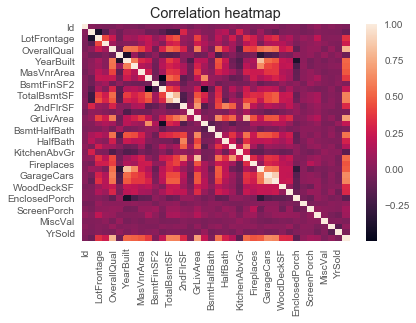

In [19]:
numeric_features = housePropertyDataset.select_dtypes(include=[np.number])
sns.heatmap(numeric_features.corr())
plt.title('Correlation heatmap')
plt.show()

## Box Plot

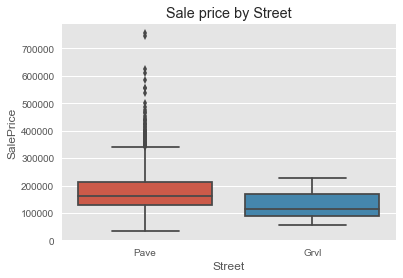

In [20]:
sns.boxplot(x='Street', y='SalePrice', data=housePropertyDataset)
plt.title('Sale price by Street')
plt.show()

## Univariate Plots

In [25]:
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

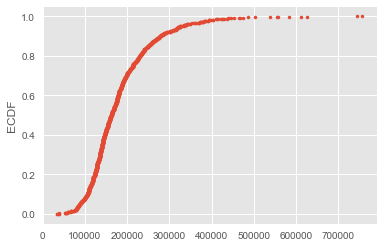

In [26]:
SalePrice = housePropertyDataset['SalePrice']
x_vers, y_vers = ecdf(SalePrice)

plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

plt.ylabel('ECDF')

plt.show()